In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

You will be presenting to your fellow analytics team members, ahead of a meeting with the marketing team of an airline group in Australia. This airline group owns several distinct brands and covers many destinations. Your manager has briefed you on analysing the data available to answer the below questions from the marketing team. 

Your presentation will include your findings after analysing the data, as well as any recommendations you would make to the airline group clients. Note that the analysis is not necessarily limited to the questions below. It is encouraged to present any findings that would be valuable to the airline group’s business, beyond the questions the clients have asked. 

To complete this task, you have been given the airline group sales database, as well as the advertising media spend by each brand in the group. A glossary is available in the third tab “Glossary”. The presentation should last 10-15 minutes, followed by questions from your fellow analytics team. 

These are the questions the airline group’s marketing team has raised: 
1.	We need a clear picture of the profitability across our group, and for our individual brands and customers.
2.	For audience segmentation and targeting purposes, we need to understand what differentiates our brands from each other. Are our different brands attracting the same customers? If not, what makes these customers different? 
3.	The airline group’s board is planning to increase advertising media spend by 20% next year. Based on the current group structure and performance, where should we invest this incremental budget to maximise the overall group’s profitability? 

In [3]:
df = pd.read_csv("database.csv")

In [4]:
df.head()

,PASSENGER_ID,BOOKING_DATE,FLIGHT_NUMBER,FLIGHT_DEPARTURE_DATE,PASSENGER_ZIP_CODE,PASSENGER_COUNTRY_CODE,AGE,BOOKING_TRAVEL_AGENCY_ZIP_CODE,AIR_FLIGHT_COMPANY_NAME,GENDER_CODE,PROFIT (AUD)
0,290344686,1/01/2012,SA,13-Jan-13,2075,AUS,55.0,2022,A,M,2909.79
1,247630864,1/01/2012,WB,4-May-13,4118,AUS,48.0,2060,A,F,1119.92
2,491321871,1/01/2012,SA,13-Jan-13,2232,AUS,53.0,2060,A,F,2447.96
3,443821994,1/01/2012,SA,5-Jan-13,2171,AUS,52.0,2606,A,M,1088.35
4,476584402,1/01/2012,SA,5-Jan-13,2171,AUS,18.0,2606,A,M,739.83


In [5]:
df.dtypes

PASSENGER_ID                        int64
BOOKING_DATE                       object
FLIGHT_NUMBER                      object
FLIGHT_DEPARTURE_DATE              object
PASSENGER_ZIP_CODE                 object
PASSENGER_COUNTRY_CODE             object
AGE                               float64
BOOKING_TRAVEL_AGENCY_ZIP_CODE     object
AIR_FLIGHT_COMPANY_NAME            object
GENDER_CODE                        object
PROFIT (AUD)                      float64
dtype: object

In [6]:
# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
# Convert date columns to date format
df["BOOKING_DATE"] = pd.to_datetime(df["BOOKING_DATE"], dayfirst = True)
df["FLIGHT_DEPARTURE_DATE"] = pd.to_datetime(df["FLIGHT_DEPARTURE_DATE"], dayfirst = True)

In [7]:
df.dtypes

PASSENGER_ID                               int64
BOOKING_DATE                      datetime64[ns]
FLIGHT_NUMBER                             object
FLIGHT_DEPARTURE_DATE             datetime64[ns]
PASSENGER_ZIP_CODE                        object
PASSENGER_COUNTRY_CODE                    object
AGE                                      float64
BOOKING_TRAVEL_AGENCY_ZIP_CODE            object
AIR_FLIGHT_COMPANY_NAME                   object
GENDER_CODE                               object
PROFIT (AUD)                             float64
dtype: object

Missing Values

In [8]:
df.isnull().sum()

PASSENGER_ID                      0
BOOKING_DATE                      0
FLIGHT_NUMBER                     0
FLIGHT_DEPARTURE_DATE             0
PASSENGER_ZIP_CODE                7
PASSENGER_COUNTRY_CODE            0
AGE                               1
BOOKING_TRAVEL_AGENCY_ZIP_CODE    1
AIR_FLIGHT_COMPANY_NAME           0
GENDER_CODE                       1
PROFIT (AUD)                      0
dtype: int64

Bookings

In [11]:
# Add column for difference between the booking dates and flight departure dates
df["DIFFERENCE"] = (df["FLIGHT_DEPARTURE_DATE"] - df["BOOKING_DATE"]).dt.days

In [12]:
# Summary statistics for each company
summary_stats = df.groupby("AIR_FLIGHT_COMPANY_NAME")["DIFFERENCE"].describe().round(2)
print(summary_stats)

                           count    mean     std  min    25%    50%    75%  \
AIR_FLIGHT_COMPANY_NAME                                                      
A                        37536.0  211.66  121.89  2.0  113.0  200.0  295.0   
B                         9611.0  223.58  143.42  4.0  108.0  207.0  317.0   
C                         1007.0  232.30  153.48  5.0  121.0  212.0  316.0   

                            max  
AIR_FLIGHT_COMPANY_NAME          
A                        1630.0  
B                        1794.0  
C                        1557.0  


<AxesSubplot: title={'center': 'DIFFERENCE'}, xlabel='AIR_FLIGHT_COMPANY_NAME'>

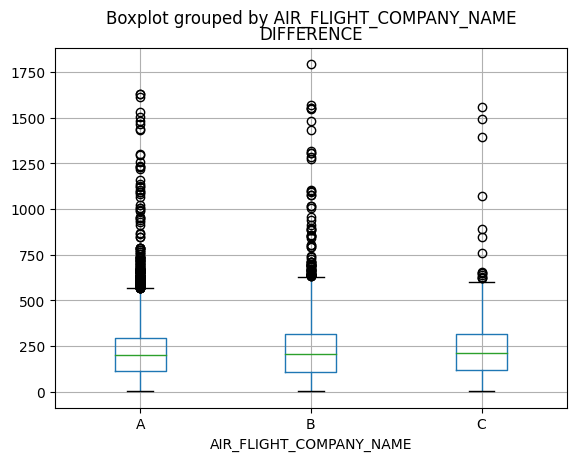

In [ ]:
df.boxplot(column = ["DIFFERENCE"], by = "AIR_FLIGHT_COMPANY_NAME")

array([[<AxesSubplot: title={'center': 'A'}>,
        <AxesSubplot: title={'center': 'B'}>],
       [<AxesSubplot: title={'center': 'C'}>, <AxesSubplot: >]],
      dtype=object)

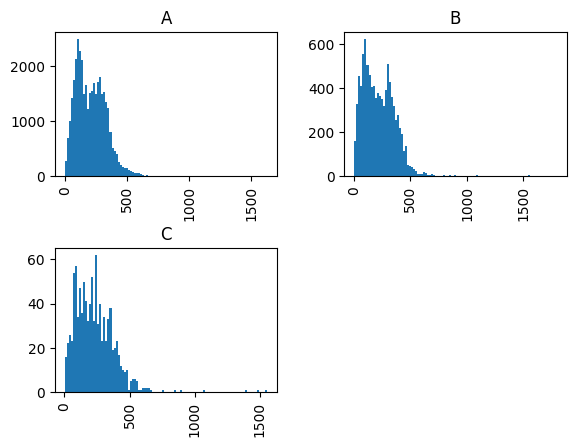

In [ ]:
df.hist(column = ["DIFFERENCE"], by = "AIR_FLIGHT_COMPANY_NAME", bins = 100)

In [ ]:
# Scatter plot booking date vs travel date
# Bigger circle bigger profit?

In [ ]:
# Amount of departure dates during holiday periods (public holidays (long weekends), school holidays)

In [ ]:
# Corresponding booking dates

In [ ]:
# Amount of departure dates during each season (summer, winter, autumn, spring)

In [ ]:
# Corresponding booking dates

Profit

In [ ]:
# Total profit
total_profit = df["PROFIT (AUD)"].sum().round(2)
print(total_profit)

59066624.33


In [ ]:
# Individual company profit
company_profits = df.groupby("AIR_FLIGHT_COMPANY_NAME")["PROFIT (AUD)"].sum().round(2)
print(company_profits)

AIR_FLIGHT_COMPANY_NAME
A    42914618.06
B    13728786.15
C     2423220.12
Name: PROFIT (AUD), dtype: float64


In [ ]:
# Percent of total profit from each company

In [ ]:
# Monthly profit

In [ ]:
# Bar chart of monthly profit

In [ ]:
# Profits from each state and international bookings

Demographics

In [ ]:
# Descriptive stats for age

In [ ]:
# Bar chart to show distribution of ages: decide on bins

In [ ]:
# Descriptive stats for gender

In [ ]:
# Bar chart to show count of male and female passengers

Media Spend

In [15]:
df_media = pd.read_csv("media_spend.csv")

In [16]:
df_media.head()

,Category,Company,Market,Media Type,January,February,March,April,May,June,July,August,September,October,November,December
0,Airlines,A,National,Magazines,30000,30000,10000,30000,48000,48000,20000,5000,26000,30000,20000,39000
1,Airlines,A,National,Digital,37000,32000,63000,97000,213000,335000,17000,38000,141000,298000,187000,97000
2,Airlines,B,National,Metropolitan Press,0,0,0,0,40000,0,0,13000,0,0,27000,0
3,Airlines,B,National,Magazines,27000,206000,29000,60000,195000,66000,34000,126000,34000,34000,224000,55000
4,Airlines,B,National,Digital,21000,9000,13000,14000,34000,39000,117000,271000,234000,124000,85000,37000


In [18]:
df_media.dtypes

Category      object
Company       object
Market        object
Media Type    object
January        int64
February       int64
March          int64
April          int64
May            int64
June           int64
July           int64
August         int64
September      int64
October        int64
November       int64
December       int64
dtype: object

In [20]:
df_media.isnull().sum()

Category      0
Company       0
Market        0
Media Type    0
January       0
February      0
March         0
April         0
May           0
June          0
July          0
August        0
September     0
October       0
November      0
December      0
dtype: int64

In [23]:
# Split the horizontally partitioned data into separate dataframes for each company
companies = df_media.groupby("Company")
df_a = companies.get_group("A")
df_b = companies.get_group("B")
df_c = companies.get_group("C")

In [26]:
df_a.head()

,Category,Company,Market,Media Type,January,February,March,April,May,June,July,August,September,October,November,December
0,Airlines,A,National,Magazines,30000,30000,10000,30000,48000,48000,20000,5000,26000,30000,20000,39000
1,Airlines,A,National,Digital,37000,32000,63000,97000,213000,335000,17000,38000,141000,298000,187000,97000
7,Airlines,A,New South Wales,Metropolitan Television,49000,96000,231000,165000,29000,277000,43000,17000,244000,205000,626000,128000
8,Airlines,A,New South Wales,Metropolitan Press,0,0,9000,25000,0,0,0,0,0,57000,0,0
9,Airlines,A,New South Wales,Regional Press,0,0,15000,0,0,0,0,0,0,0,0,6000


In [ ]:
# Split each company into spending across regions?
# Define a function that takes the company dataframe and splits it into each region
# Groupby on mediatype?